# Anna Francisco
### *Section 001*

# Predicting Critical Temperatures of Superconductors

This analysis was conducted using a data set from Kaggle (https://www.kaggle.com/datasets/tunguz/superconductivty-data-data-set). As there are two data sets on this website, you will only need to download the train.csv file. The train.csv file will need to be downloaded into the same folder as the current juypter notebook, which is usually by default the 'Downloads' folder.

### Main Objective of Analysis:
To answer the question of what features of a superconductor can be used to predict values of its critical temperature.

# *Background*
Superconductivity is a phenomenon observed in materials when they exhibit zero electrical resistance when cooled below a critical temperature. The critical temperature is a key feature that characterizes the superconducting behavior of materials. Understanding the factor that influence a material's critical temperature is a key factor in advancing materials science and engineering aspects.


# *Introduction*

The dataset chosen has various properties of a superconducting material along with the superconductor's critical temperature. By utilizing the data, we can analyze and visualize various aspects of the properties given. Through data analysis, we can cut down on the data set into the most important propeties and then utilize that to help predict potential future data points of critical temperature and its properties.

We will need to import the required libraries including Pandas, NumPy, Matplotlib, Seaborn, and Scipy.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

We need to first load the dataset (train.csv) using the read_csv function into a DataFrame named df and then display the DataFrame to inspect the structure and contents of the data.

In [2]:
df=pd.read_csv('train.csv', delimiter=',')
print(df)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

As many of the columns in the dataset are repeated properties, such as entropy_Valence and wtd_gmean_Valence, we need to shorten our data set. We will isolate only one column for every unique property, included in this are standard deviation and weighted means values that will not be included in this analysis of the dataset.

# **Methodology**

As the dataset has over 80 columns, we want to narrow down the columns into a selected set based on a prediction of what columns will have the greatest coorealation to the overal critical temperature, as well as reducing any redundancy in the data. The chosen columns should be physical and chemical properties that influence critical temperature based on previous knowledge. The selected columns were decided to be:

* number_of_elements:
    * the number of elements in a material can significantly impact its overall properties
    
* mean_atomic_mass:
    * the atomic mass influences the density of materials

* entropy_atomic_mass:
    * this variable reflects the entropy of atomic mass which is based off of the distribution of atomic masses within a material

* mean_fie:
    * variable represents the first ionization energy, which is the energy required to remove an electron from an atom

* mean_atomic_radius:
    * the atomic radius affects the  density of atoms

* entropy_atomic_radius:
    * represents the entropy of an atom's radius

* mean_Density:
    * shows the material's density

* entropy_Density:
    * the variable represents the entropy of density of a given material and reflects variations in a material's density

* mean_ElectronAffinity:
    * this variable describes the amount energy released when an electron is added to an atom

* mean_FusionHeat:
    * represents fusion heat of a matieral and indicates the energy required to change a solid to a liquid

* mean_ThermalConductivity:
    * the variable represents a matieral's thermal conductivity which affects heat dissipation

* mean_Valence:
    * the variable represents the number of bonds an atom can form which is based off of its number of valence electrons present


In [3]:
columns_of_interest = ['number_of_elements', 'mean_atomic_mass', 'entropy_atomic_mass', 
                       'mean_fie', 'mean_atomic_radius', 'entropy_atomic_radius', 
                       'mean_Density', 'entropy_Density', 'mean_ElectronAffinity', 
                       'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence']

As we now have our columns of interest, we can create a correlation matrix to easily show what elements between all of the selected data have a postive or negative correlation to not only the critical temperature, but also each other. Each individual value in the matrix represents the Pearson correlation coefficient (the default correlation matrix function) value.

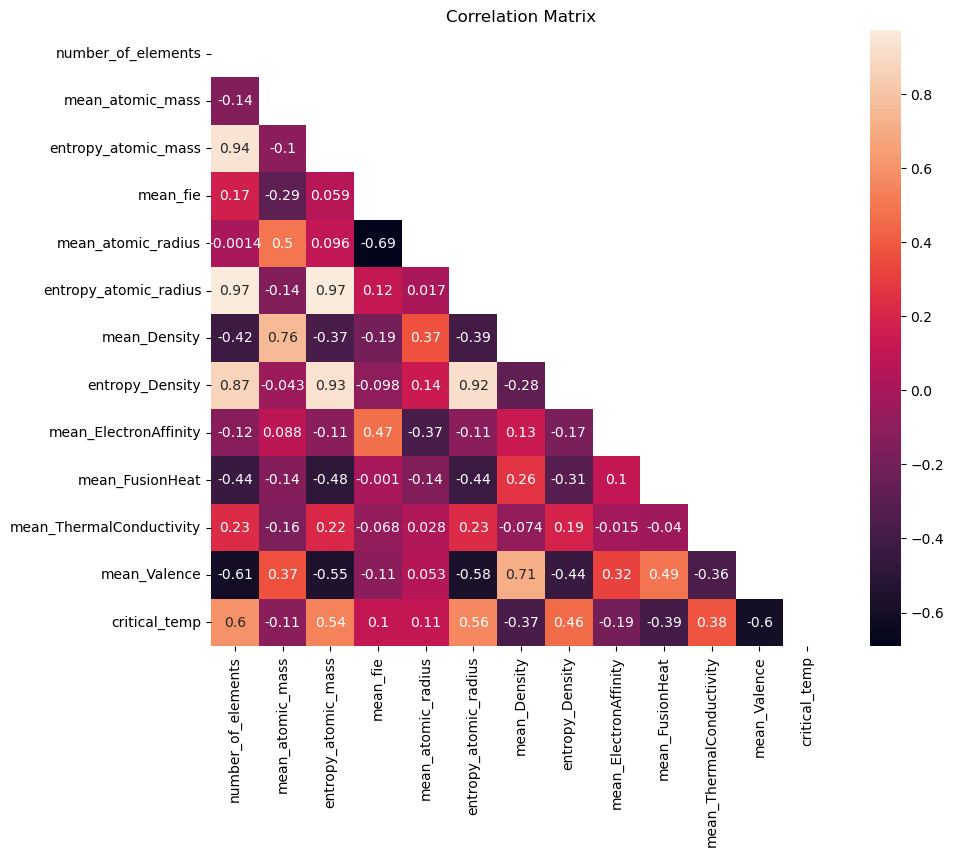

In [4]:
if 'critical_temp' not in columns_of_interest:
    columns_of_interest.append('critical_temp')
    selected_columns = df[columns_of_interest]
    correlation_matrix = selected_columns.corr()

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    #np.triu() creates an upper triangular matrix from a given matrix
    #ones_like() function creates a matrix of the same shape as correlation_matrix
    
    dataplot = sns.heatmap(correlation_matrix, annot=True, mask=mask)
    #annot=True adds numerical annotations to each cell of the heatmap.
    #mask=mask hides the upper triangle of the heatmap based on the previous defined mask
    plt.title('Correlation Matrix')
    plt.show()

Looking at the above matrix, we can isolate only those columns with more potential influnce by looking at the variables with an absolute correlation value greater than 0.5. 

By taking these columns, we can plot these as a function of critical temperature to visualize their relationship. However, to best identify a good curve fit, we will calculate residuals for 3 different types of models: linear, exponenital, and guassian. These residuals will be calculated for every column chosen, and the lowest residuals are chosen for each data set to be utilized to curve fit the data.

In [5]:
def determine_relationship_type(df, feature_column):
    X = df[feature_column]
    y = df['critical_temp']
    
    def linear_func(x, a, b):
        return a * x + b
    try:
    #attempts to fit linear model to the data using curve_fit from scipy.optimize
        popt_linear, _ = curve_fit(linear_func, X, y)
        residuals_linear = y - linear_func(X, *popt_linear)
        rss_linear = np.sum(residuals_linear ** 2)
        linear_params = len(popt_linear)  
    except:
        rss_linear = None
        linear_params = None
    #if the curve fitting fails, it sets rss_linear and linear_params to none
    def exponential_func(x, a, b):
        return a * np.exp(b * x)
    try:
        popt_exponential, _ = curve_fit(exponential_func, X, y)
        residuals_exponential = y - exponential_func(X, *popt_exponential)
        rss_exponential = np.sum(residuals_exponential ** 2)
        exponential_params = len(popt_exponential)
    #attempts to fit exponential model to the data using curve_fit from scipy.optimize
    except:
        rss_exponential = None
        exponential_params = None
    #if the curve fitting fails, it sets rss_exponential and exponential_params to none
    def gaussian_func(x, a, b, c):
        return a * np.exp(-(x - b)**2 / (2 * c**2))
    #function found on “Python - Gaussian Fit” (see sources section)
    
    #functions defines a gaussian that models a normal distribution
    try:
        popt_gaussian, _ = curve_fit(gaussian_func, X, y, p0=[1, np.mean(X), np.std(X)])
        residuals_gaussian = y - gaussian_func(X, *popt_gaussian)
        rss_gaussian = np.sum(residuals_gaussian ** 2)
        gaussian_params = len(popt_gaussian)
    except:
        rss_gaussian = None
        gaussian_params = None
    #if the curve fitting fails, it sets rss_gaussian and gaussian_params to none
    
    rss_values = {
        'linear': rss_linear,
        'exponential': rss_exponential,
        'gaussian': rss_gaussian
    }
    #rss measures the differences between predicted and actual values
    
    best_model = min(rss_values, key=rss_values.get)
    #selects model with the smallest RSS among the 3 tested
    #key=rss_values.get defines that the minimum should be determined based on rss_values
    
    return best_model

The below code is a test code to run to see if the function works as expected and doesn't return any errors.

In [6]:
#Test Column Example
feature_column = 'mean_Valence'
relationship_type = determine_relationship_type(df, feature_column)
print(f"The relationship between '{feature_column}' and critical temperature is best modeled as: {relationship_type}")

The relationship between 'mean_Valence' and critical temperature is best modeled as: gaussian


We still need to identify a best fit curve for these columns. The new plot_relationship function is used to visualize the relationship between a column and the critical temperature. This function utilizes the previously defined function, determine_relationship_type, to identify the best-fitting relationship type for the  column. Based on the identified relationship type, it then generates a scatter plot of the data and overlays a fitted curve based on the relationship type previously defined.

In [12]:
def plot_relationship(df, column):
    relationship_type = determine_relationship_type(df, column)
    X = df[column]
    y = df['critical_temp']
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.5, label='Data')
    
    if relationship_type == 'gaussian':
        def gaussian_func(x, a, b, c):
            return a * np.exp(-(x - b)**2 / (2 * c**2))
        try:
        #p0 is the inital guess for the curve fit
            p0 = [max(y), np.mean(X), np.std(X)]
            #max(y) is the maximum value of the 'critical_temp'
            #np.mean(X) is the mean of the column
            #np.std(X) is the standard deviation of the column
            popt_gaussian, _ = curve_fit(gaussian_func, X, y, p0=p0)
            X_curve = np.linspace(min(X), max(X), 100)
            #creates x values for the curve
            plt.plot(X_curve, gaussian_func(X_curve, *popt_gaussian), color='black', label='Gaussian Fit')
            plt.legend()
            plt.title(f"{column} vs. Critical Temperature (Gaussian Fit)")
        except:
            print("Fit Failed")

The plot_curvefit function is designed to fit a curve to the relationship between a property (i) and the critical temperature which is represented as df. It utilizes the curve_fit function from scipy.optimize to estimate the parameters of the curve that fit the best. The extension of the trend line beyond the original data range provides insights into the potential behavior of the feature across a larger range of values.

In [17]:
extendedcurvefit=['number_of_elements',"mean_Valence", 'entropy_atomic_mass', 'entropy_atomic_radius']
def gaussian_func(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))  
#guassian function defined again due to error appearing
#in results section when attempting to run all cells

def plot_curvefit(df, i):
    popt, _ = curve_fit(gaussian_func, df[i], df['critical_temp'])
    a, b, c = popt
    plt.scatter(df[i], df['critical_temp'], label='Data')

    x_range = np.linspace(min(df[i]), max(df[i]), 100)
    plt.plot(x_range, gaussian_func(x_range, a, b, c), color='black', label='Gaussian Trend')

    original_max_x = max(df[i])
    extended_x = np.linspace(original_max_x, 1.5 * original_max_x, 100)
    extended_y = gaussian_func(extended_x, a, b, c)
    #extends the curve beyond the original range to the extended x values

    plt.plot(extended_x, extended_y, color='red', linestyle='--', label='Extended Gaussian Trend')
    plt.xlabel(i)
    plt.ylabel('Critical Temperature')
    plt.title(f'Gaussian Trend with Extension for {i}')
    plt.legend()
    plt.show()


# **Results**


Running the cell below, results in the plotting of four distinct graphs all with a gaussian curve fit. All of the graph have skewed distributions. However, only mean_Valence has a right skewed distribition while all other scatterplot contain a left skew.

The scatterplots for both entropy_atomic_radius and entropy_atomic_mass are extremely similar to each other, which makes reasonable sense considering they have a high correlation between themselves. Their data is relatively similar, so their curve fit is also very similar.

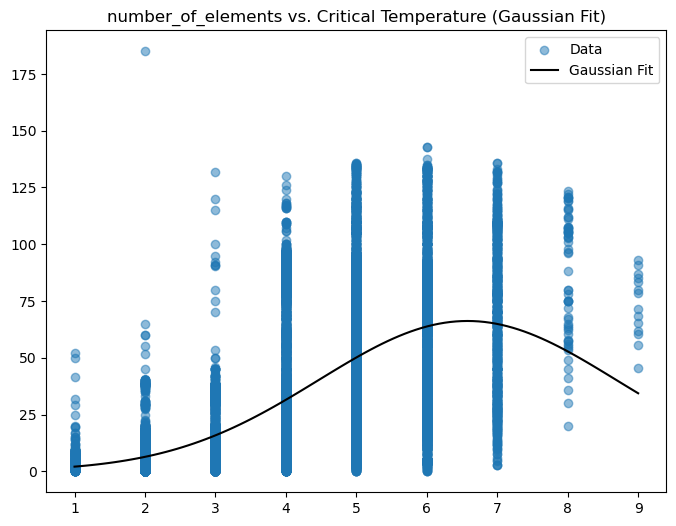

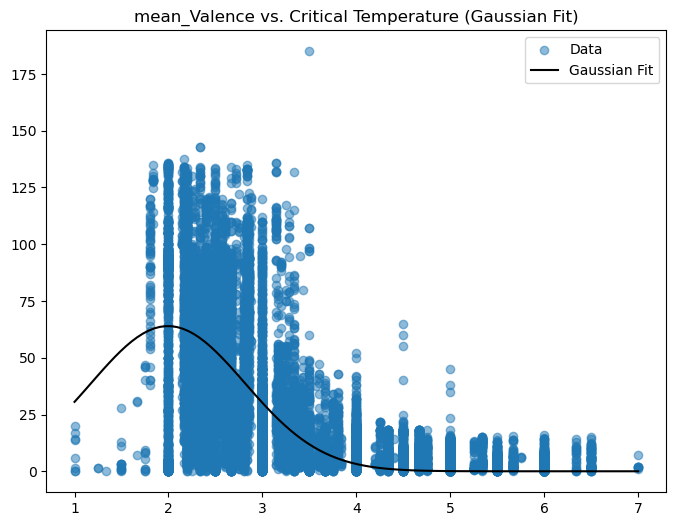

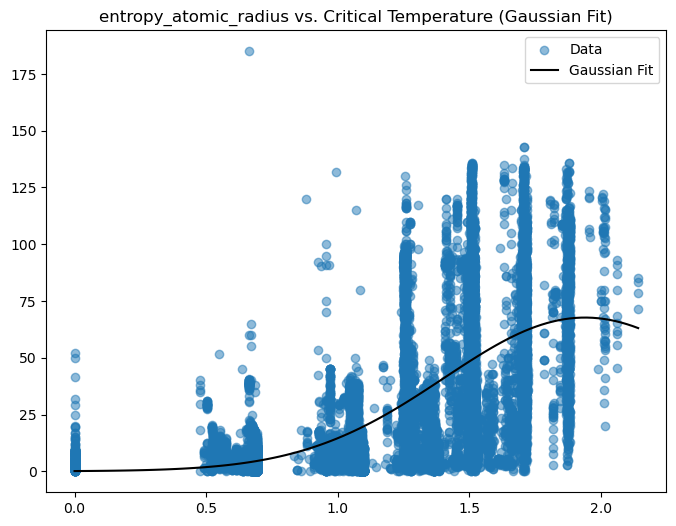

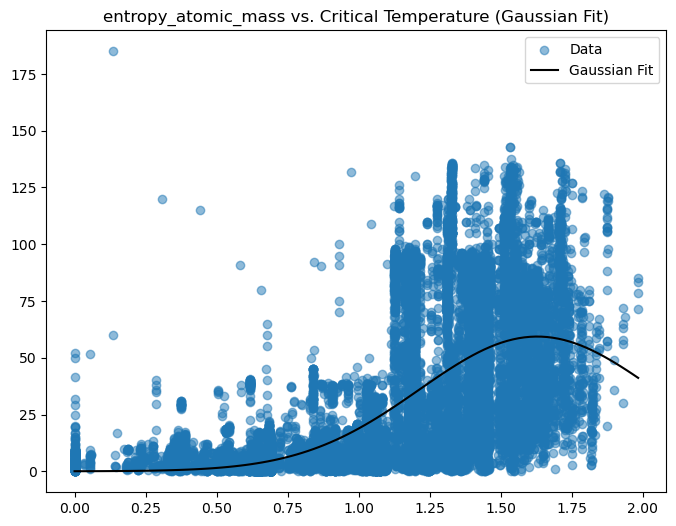

In [18]:
plot_relationship(df, 'number_of_elements')
plot_relationship(df, 'mean_Valence')
plot_relationship(df, 'entropy_atomic_radius')
plot_relationship(df, 'entropy_atomic_mass')

The below graphs created after running the cell all contain an extended trend line based on a potential increasing X value.

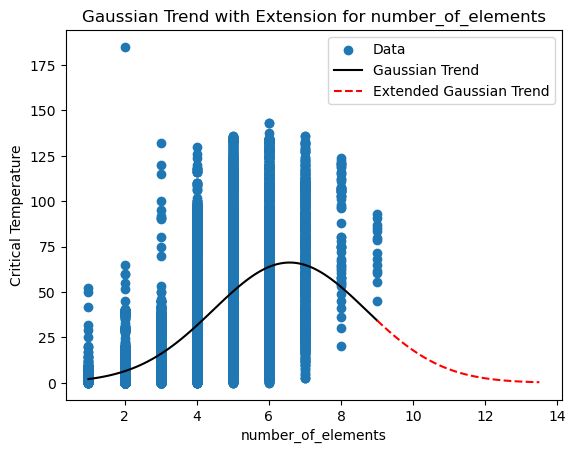

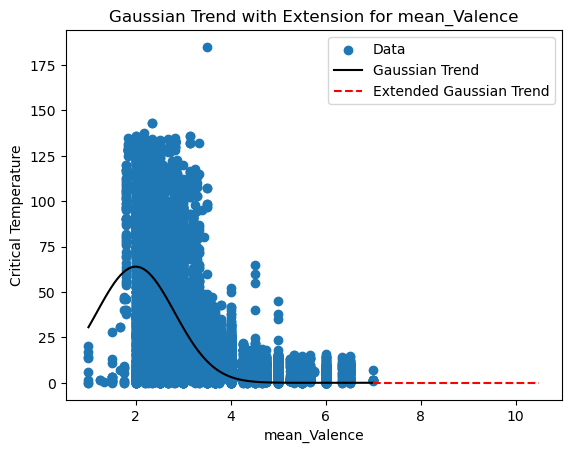

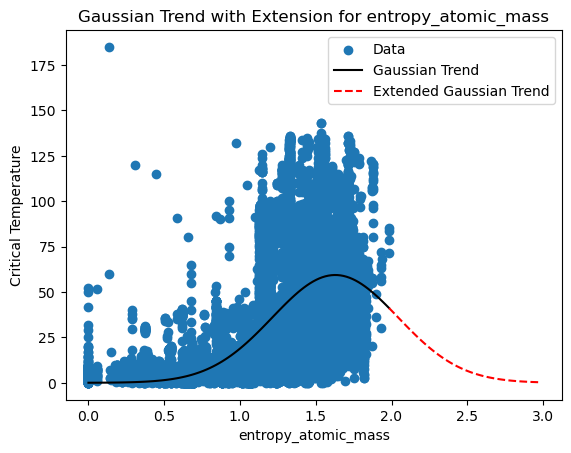

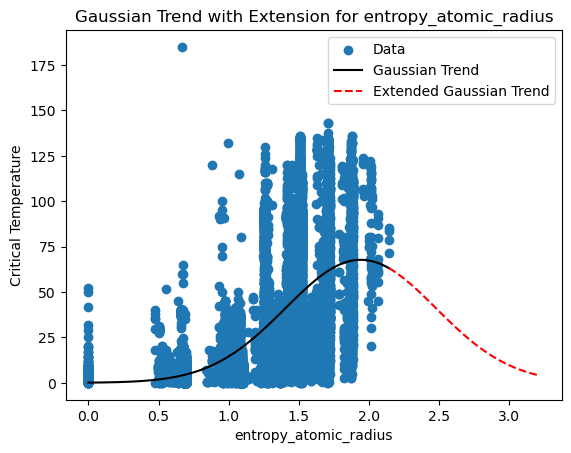

In [19]:
for i in extendedcurvefit:
    plot_curvefit(df,i)

The plots below showcase any potential error created by the curve fit, by plotting all of the residual values for the four properties.

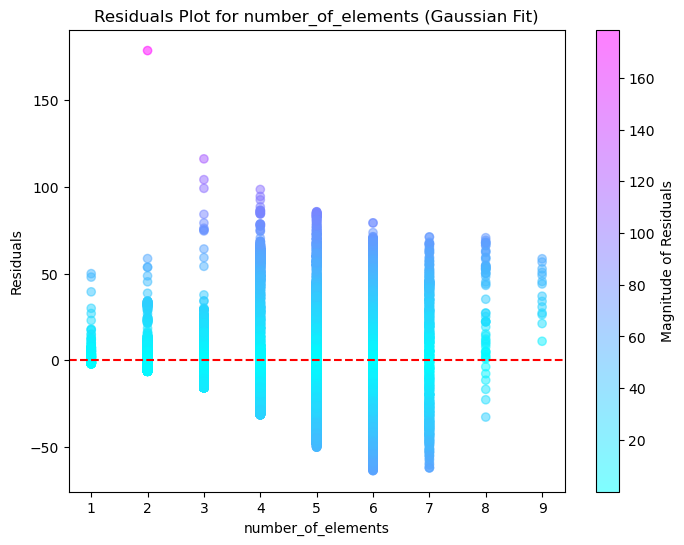

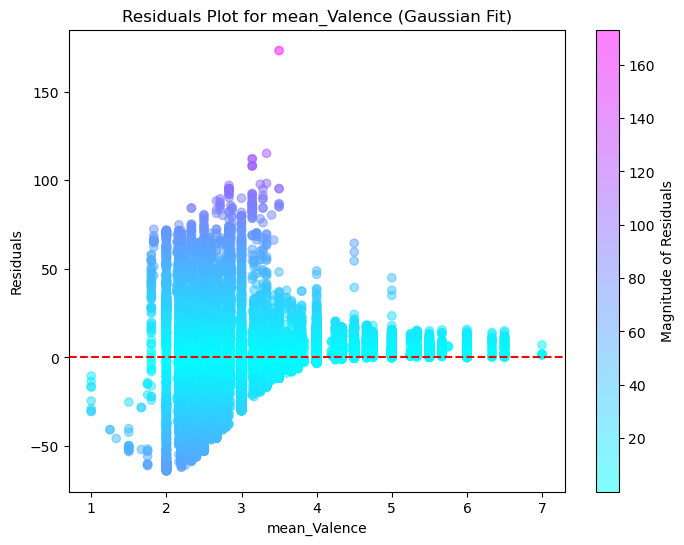

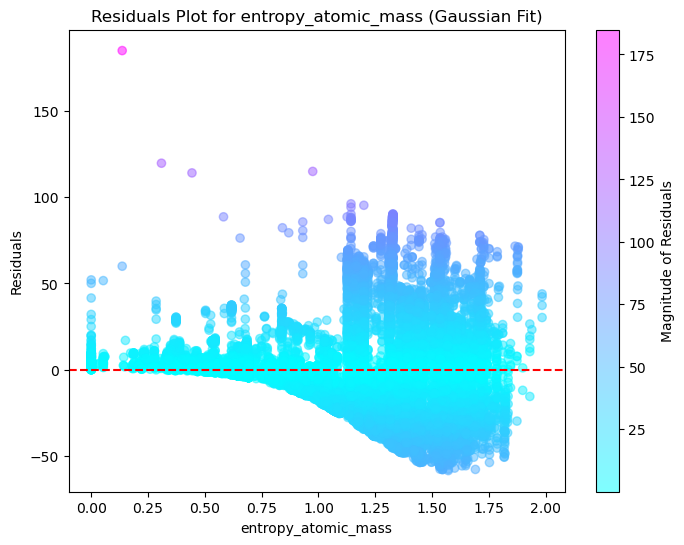

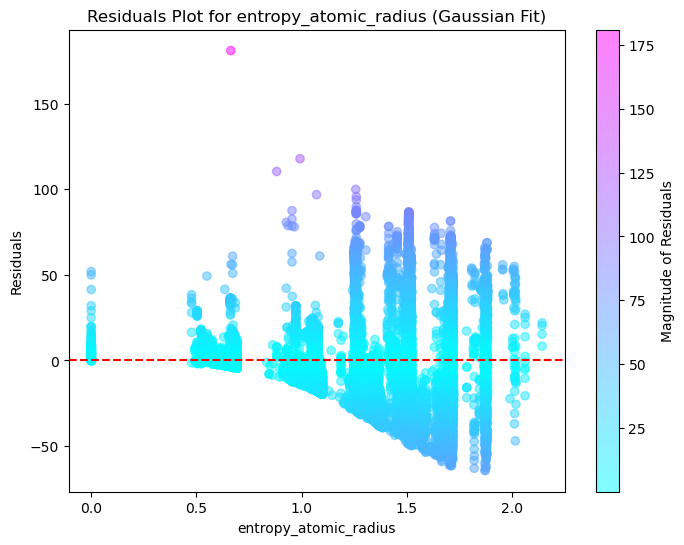

In [25]:
for column in extendedcurvefit:
    X = df[column].values
    y = df['critical_temp'].values
    
    popt_gaussian, _ = curve_fit(gaussian_func, X, y, p0=[1, np.mean(X), np.std(X)])
    #curve_fit fits the gaussian_func to the data with initial guess parameters(p0)
    #popt_gaussian contains the optimized parameters (a,b,c) for the function
    residuals = y - gaussian_func(X, *popt_gaussian)
    #gaussian_func(X, *popt_gaussian) computes the predicted values from the curve fit
    #residuals calculates the difference between the actual values and the predicted values from the fit
    abs_residuals = np.abs(residuals)
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(X, residuals, c=abs_residuals, cmap='cool', alpha=0.5)
        #s=marker_size sets the size of markers
        #c=abs_residuals sets the color of markers based on the absolute residuals
        #alpha=0.5 sets transparency to 50%
    plt.axhline(y=0, color='r', linestyle='--')
    #adds a red dashed horizontal line at y=0
    plt.title(f"Residuals Plot for {column} (Gaussian Fit)")
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.colorbar(sc, label='Magnitude of Residuals')

These residual graphs show that although there is low residual values in certain parts of these plots, there is a potential for high skews in certain areas that do not fit with our determined curve fit function.

# Conclusion

The analysis identified 'number_of_elements' and 'mean_Valence' as the most influential features for predicting critical temperature with other properties that have significant relevance being 'entropy_atomic_mass' and 'entropy_atomic_radius.' These were identified based off of their correlation (where 1 is a postive perfect correlation, -1 is a negative perfect correlation, and 0 is no correlaiton) with the highest absolute values of the correlation coefficient. 

Plotting these as a function of critical temperature indicated that there was a function that describes their relationships to a moderate degree of accuracy. The attempt to plot these functions utilize an estimatation based on RSS values, which proved vaguely successful when choosing between 3 models but can still be improved upon.

Potential improvement to the models include testing for various other curve fit function types including trigonometric functions, polynomial functions, or exponential decay. For example, although for all 4 graphs the function identify the best fit to be a gaussian, it is not entirely accurate and has room for improvement in curve fit.

There is also potential to utilize machine learning technqiues to predict new data points or generate a potential set of property values when given a 'goal critical temperature.'

These data sets include outlier values which is shown in every plot, and creating a function to remove these data points would likley improve our model significantly. These outliers are likley caused by different properties or combination of properties that make them unique and cannot be considered in our relatively simple model.

# Sources

“Python - Gaussian Fit.” GeeksforGeeks, GeeksforGeeks, 14 Jan. 2022, www.geeksforgeeks.org/python-gaussian-fit/. 

Tunguz, Bojan. “Superconductivity Data Data Set.” Kaggle, 15 Apr. 2021, www.kaggle.com/datasets/tunguz/superconductivty-data-data-set. 